In [2]:
!pip install netCDF4

  Using cached netCDF4-1.5.5.1-cp36-cp36m-manylinux2014_x86_64.whl (4.7 MB)
  Using cached cftime-1.3.1-cp36-cp36m-manylinux2014_x86_64.whl (325 kB)
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/chainer_p36/bin/python -m pip install --upgrade pip' command.


In [3]:
import netCDF4

In [4]:
!pip install xarray

  Using cached xarray-0.16.2-py3-none-any.whl (736 kB)
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/chainer_p36/bin/python -m pip install --upgrade pip' command.


In [5]:
INPUT_FILE = 'super_resolution_sample.nc'

In [6]:
import xarray as xa
sample_x = xa.open_dataset(INPUT_FILE, group='/train/x')

In [8]:
#Importing All major The Necessary Packages
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
from sklearn.decomposition import PCA
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 

In [9]:
df = sample_x.to_dataframe()
sdf = StandardScaler().fit_transform(df)
ssdf=pd.DataFrame(sdf,columns=df.columns)
y = ssdf['tt']
X = ssdf.drop(columns=['tt'])

In [11]:
!pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/chainer_p36/bin/python -m pip install --upgrade pip' command.


In [13]:
!pip install tensorflow

  Using cached tensorflow-2.4.1-cp36-cp36m-manylinux2010_x86_64.whl (394.3 MB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached grpcio-1.32.0-cp36-cp36m-manylinux2014_x86_64.whl (3.8 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached google_auth-1.24.0-py2.py3-none-any.whl (114 kB)
  Using cached cachetools-4.2.0-py3-none-any.whl (12 kB)
  Using cached google_auth_oauthlib-0.4.2-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.3-py3-none-any.whl (96 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-an

In [14]:
import numpy as np
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#cleaning test data
df1 = df.replace([np.inf, -np.inf], np.nan)
df1 = df1.dropna()
df1
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df1.values)
df_scaled

array([[0.40298843, 0.46799153, 0.3645045 , ..., 1.        , 0.55384076,
        0.54923   ],
       [0.40298843, 0.5009535 , 0.35969442, ..., 1.        , 0.55384076,
        0.54923   ],
       [0.40298843, 0.5165713 , 0.35822666, ..., 1.        , 0.55384076,
        0.54923   ],
       ...,
       [0.2726695 , 0.5290173 , 0.02672067, ..., 1.        , 0.44574922,
        0.4212182 ],
       [0.2726695 , 0.522433  , 0.01947019, ..., 1.        , 0.44574922,
        0.4212182 ],
       [0.38650897, 0.5121951 , 0.25740963, ..., 1.        , 0.4803387 ,
        0.43036595]], dtype=float32)

In [16]:
# having the dataset as x and y . Making x into a 3-d data and y as 2-d data ie.) reshaping
X_train = []
y_train = []
n_output_steps = 1  # Number of outputs we want to predict into the future
n_input_steps = 1   # Number of past inputs that we want to use to predict the future
for i in range(n_input_steps, len(df_scaled) - n_output_steps +1):
    X_train.append(df_scaled[i - n_input_steps:i, 0:df.shape[1] - 1])
    y_train.append(df_scaled[i + n_output_steps - 1:i + n_output_steps, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print('X_train shape == {}.'.format(X_train.shape))   # no.of samples, no. of time stamps, no. of features
print('y_train shape == {}.'.format(y_train.shape))   # no. of features, no. of output time steps

X_train shape == (1310719, 1, 14).
y_train shape == (1310719, 1).


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mg_delta,1310720.0,8.190377e-05,5.237102e-02,-0.600006,5.995204e-14,5.995204e-14,5.995204e-14,0.888885
me_delta,1310720.0,-3.293303e-01,1.606373e+02,-802.300781,-5.605078e+01,6.054688e-01,4.573828e+01,754.417969
zp_delta,1310720.0,9.911274e-01,1.896571e+00,-3.436426,-1.747074e-01,9.703121e-01,2.205969e+00,10.369238
vg_delta,1310720.0,-2.400970e-01,6.023849e+00,-24.000000,2.398082e-12,2.398082e-12,2.398082e-12,23.000000
td,1310720.0,2.213414e+00,4.322602e+00,-16.530655,-6.446228e-01,2.276978e+00,5.283249e+00,15.315201
tt,1310720.0,4.985594e+00,4.642217e+00,-13.840759,1.889038e+00,4.760803e+00,8.070129e+00,24.987335
pn,1310720.0,1.021847e+03,7.959141e+00,1005.616333,1.012298e+03,1.014240e+03,1.016953e+03,1023.601685
nt,1310720.0,5.036243e-01,4.228306e-01,0.000000,0.000000e+00,5.346680e-01,9.658203e-01,1.000000
h,1310720.0,1.012061e+03,5.427440e+02,54.975586,4.546646e+02,1.276395e+03,1.499817e+03,2250.394775
rt,1310720.0,6.862428e-08,2.120975e-07,0.000000,0.000000e+00,0.000000e+00,2.235174e-08,0.000005


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
#Variables
x=df.drop(columns=['tt'])
y=pd.DataFrame(df['tt'],columns=['tt'])
y=np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [21]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [27]:
from keras import models, layers

model = Sequential()
model.add(Dense(100, input_dim=14, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(75, activation='tanh'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, kernel_initializer='uniform', activation='tanh'))
# output layer
model.add(layers.Dense(1))

In [28]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [29]:
history = model.fit(X_train, y_train, epochs=150, batch_size=160,  verbose=1, validation_split=0.2)

Epoch 1/150
4916/4916 [==============================] - 40s 8ms/step - loss: 0.0172 - mse: 0.0172 - mae: 0.0877 - val_loss: 0.0018 - val_mse: 0.0018 - val_mae: 0.0290
Epoch 2/150
4916/4916 [==============================] - 37s 7ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0289 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0266
Epoch 3/150
4916/4916 [==============================] - 35s 7ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0256 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0245
Epoch 4/150
4916/4916 [==============================] - 37s 7ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0236 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0244
Epoch 5/150
4916/4916 [==============================] - 36s 7ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0224 - val_loss: 9.8046e-04 - val_mse: 9.8046e-04 - val_mae: 0.0215
Epoch 6/150
4916/4916 [==============================] - 32s 6ms/step - loss: 9.9823e-04 - mse: 9.9823e-04 - mae: 0.0216 - val_loss: 9.3600e-04 - val_ms

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


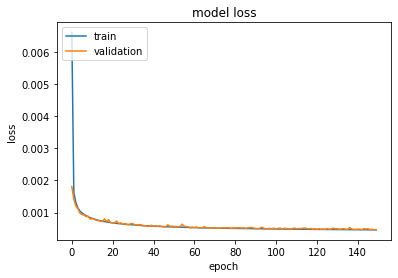

In [30]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


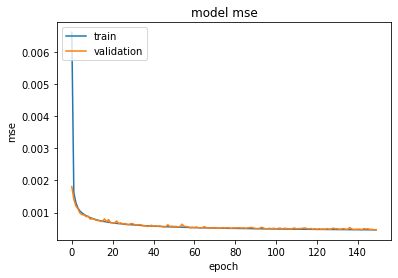

In [32]:
print(history.history.keys())
# "MSE"
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


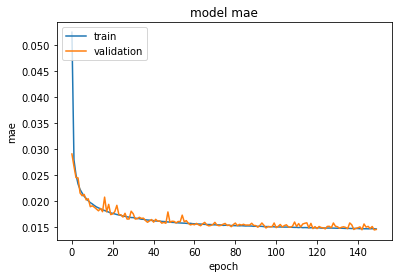

In [33]:
print(history.history.keys())
# "MAE"
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [34]:
model.evaluate(X_test, y_test)

10240/10240 [==============================] - 13s 1ms/step - loss: 4.6335e-04 - mse: 4.6335e-04 - mae: 0.0145


[0.0004633492208085954, 0.0004633492208085954, 0.014507787302136421]

In [35]:
!pip install eli5

     |████████████████████████████████| 106 kB 6.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/chainer_p36/bin/python -m pip install --upgrade pip' command.


In [36]:
!pip install shap

     |████████████████████████████████| 352 kB 6.2 MB/s eta 0:00:01
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=480261 sha256=1b040304f2ebb624af9b8e2dc12534299c9d91548f218a0c6e462c1a369093aa
  Stored in directory: /home/ec2-user/.cache/pip/wheels/4d/b0/77/f9332e31f6af68b2e00450e9033ab768fe8765f1924d01d644
Successfully built shap
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/chainer_p36/bin/python -m pip install --upgrade pip' command.


In [37]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

/home/ec2-user/anaconda3/envs/chainer_p36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [44]:
def base_model():
    model = Sequential()
    model.add(Dense(100, input_dim=14, activation='tanh'))
    model.add(Dense(75, activation='tanh'))
    model.add(Dense(50, activation='tanh'))
    model.add(Dense(25, activation='tanh'))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(1, kernel_initializer='uniform', activation='tanh'))
    # output layer
    model.add(layers.Dense(1))   

In [45]:
param_model = KerasRegressor(build_fn=base_model, epochs=150, batch_size=16, verbose=0)    
param_model.fit(X_test,y_test)

AttributeError: 'NoneType' object has no attribute 'loss'

In [38]:
param_model.model.save('saved_param_model.h5')

NameError: name 'param_model' is not defined

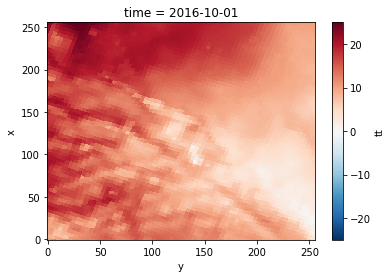

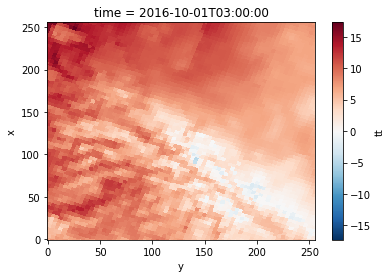

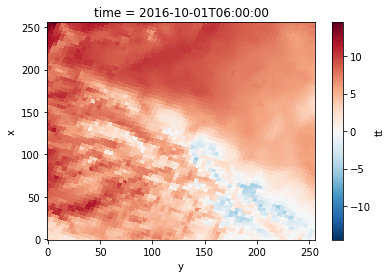

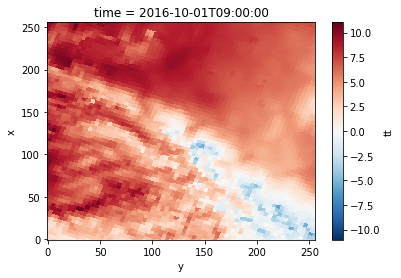

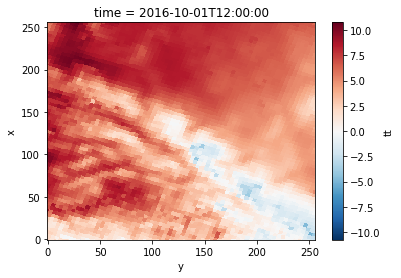

In [48]:
tas=sample_x.tt
for i in range(5):
    tas[i,:,:].plot(figsize=(6,4))
    plt.show()
    plt.close()

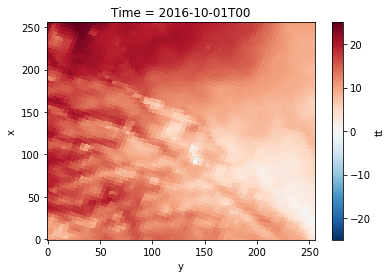

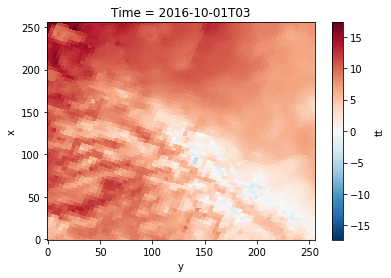

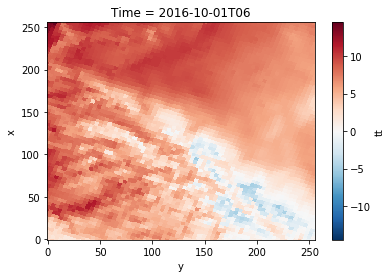

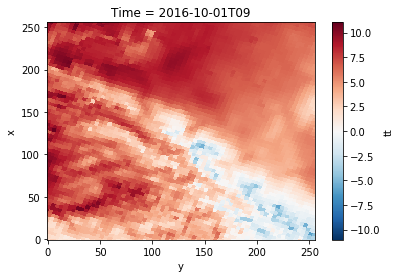

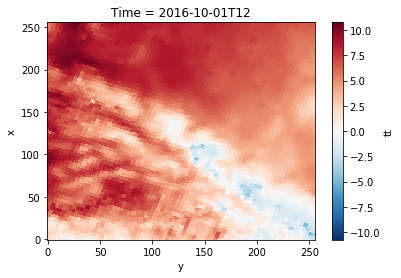

In [49]:
for i in range(5):
    tas[i,:,:].plot(figsize=(6,4))
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.show()
    plt.close()

FileNotFoundError: [Errno 2] No such file or directory: '../Untitled Folder/Python_Animation_01_frame_0000.png'

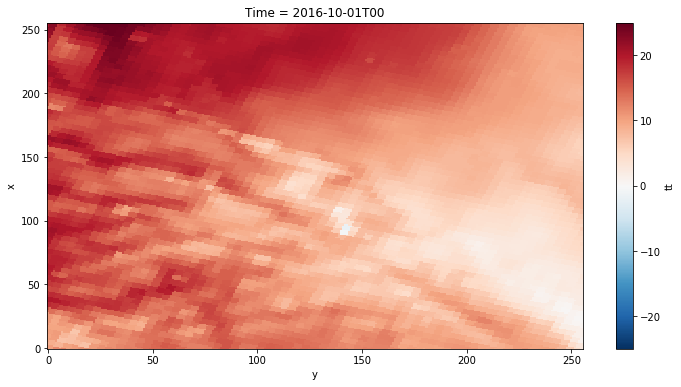

In [53]:
for i in range(20):
    tas[i,:,:].plot(
        figsize = (12,6)      # We'll make it a bit bigger
    )
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.savefig(f"../Untitled Folder/Python_Animation_01_frame_{i:04}.png")
    plt.close()

In [55]:
from IPython.display import HTML, display

!convert Python_Animation_01_frame*png Python_Animation_01.gif
display(HTML("<img src='Python_Animation_01.gif' />"))

/bin/sh: convert: command not found


In [56]:
for i in range(20):
    tas[i,:,:].plot(
        figsize = (12,6),
        vmin=-40, vmax=40  # Minimum and Maximum values
    )
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.savefig(f"Python_Animation_02_frame_{i:04}.png")
    plt.close()

In [57]:
!convert Python_Animation_02_frame*.png Python_Animation_02.gif
display(HTML("<img src='Python_Animation_02.gif' />"))

/bin/sh: convert: command not found


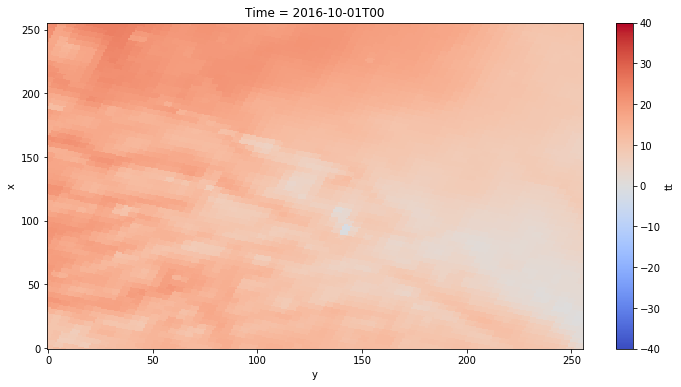

In [61]:
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(12,6))
from matplotlib import pyplot as plt, animation

# Plot the initial frame. 
cax = tas[0,:,:].plot(
    add_colorbar=True,
    cmap='coolwarm',
    vmin=-40, vmax=40,
    cbar_kwargs={
        'extend':'neither'
    }
)

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(tas[frame,:,:].values.flatten())
    ax.set_title("Time = " + str(tas.coords['time'].values[frame])[:13])

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=20,       # Could also be iterable or list
    interval=200     # ms between frames
)

In [ ]:
HTML(ani.to_jshtml())